In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
# Needed to download citipi
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

# Perform API Calls

In [41]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print (url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0


In [42]:
# list of city data
city_data = []

In [43]:
#print to a logger
print('Beginning Data Retrieval')
print('------------------------')

#create the counters
record_count = 1
set_count = 1

#loop through all the cities ino ur list
for i, city in enumerate(cities):
    
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 0
        
    #create endpoint URL with each city
    #city_url = url + "&q=" + urllib.request.pathname2url(city)
    city_url = url + "&q=" + city
    
    
    #log the URL record and set numbers
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    print(city_url)
    
    
    #Add 1 to the record count
    record_count += 1
    
    #Run an api request for eqach of the cities
    try:
        #parse teh JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # parse out the max temp, humidity, cloudiness, and wind speed
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        #append the city ifno into city data list
        city_data.append({'City' : city,
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
        
        #if an error is expereinced, skip the city
    except:
        print("City not found. Skipping...")
        pass

print('----------------------------------')
print('Data Retrieval Complete           ')
print('----------------------------------')  
            

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=mataura
Processing Record 2 of Set 1 | quzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=quzhou
Processing Record 3 of Set 1 | paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=paita
Processing Record 4 of Set 1 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=marawi
Processing Record 5 of Set 1 | marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=marystown
Processing Record 6 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=hermanus
Processing Record 7 of Set 1 | cidreira
http://api.o

Processing Record 3 of Set 2 | san vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=san vicente
Processing Record 4 of Set 2 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=cape town
Processing Record 5 of Set 2 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=taltal
Processing Record 6 of Set 2 | kabalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=kabalo
Processing Record 7 of Set 2 | sorbhog
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=sorbhog
Processing Record 8 of Set 2 | gunjur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=gunjur
Processing Record 9 of Set 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units

City not found. Skipping...
Processing Record 6 of Set 3 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=arraial do cabo
Processing Record 7 of Set 3 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=bubaque
Processing Record 8 of Set 3 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=hasaki
Processing Record 9 of Set 3 | great bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=great bend
Processing Record 10 of Set 3 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=nishihara
Processing Record 11 of Set 3 | benghazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=benghazi
Processing Record 12 of Set 3 | nueva loja
h

Processing Record 9 of Set 4 | leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=leh
Processing Record 10 of Set 4 | novyy nekouz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=novyy nekouz
Processing Record 11 of Set 4 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=kodiak
Processing Record 12 of Set 4 | senador jose porfirio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=senador jose porfirio
Processing Record 13 of Set 4 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=atar
Processing Record 14 of Set 4 | college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=college
Processing Record 15 of Set 4 | lima
http://api.openweathermap.org/data/2

Processing Record 12 of Set 5 | aitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=aitape
Processing Record 13 of Set 5 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=bandarbeyla
Processing Record 14 of Set 5 | bahia blanca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=bahia blanca
Processing Record 15 of Set 5 | nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=nelson bay
Processing Record 16 of Set 5 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=butaritari
Processing Record 17 of Set 5 | allen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=allen
Processing Record 18 of Set 5 | haines junction
http://api.openweather

Processing Record 15 of Set 6 | ziro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=ziro
Processing Record 16 of Set 6 | riverton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=riverton
Processing Record 17 of Set 6 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=dikson
Processing Record 18 of Set 6 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=kahului
Processing Record 19 of Set 6 | mozarlandia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=mozarlandia
Processing Record 20 of Set 6 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=vanimo
Processing Record 21 of Set 6 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units

City not found. Skipping...
Processing Record 20 of Set 7 | wolfenbuttel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=wolfenbuttel
Processing Record 21 of Set 7 | winona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=winona
Processing Record 22 of Set 7 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=sitka
Processing Record 23 of Set 7 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=saint anthony
Processing Record 24 of Set 7 | palafrugell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=palafrugell
Processing Record 25 of Set 7 | terney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=terney
Processing Record 26 of Set 7 | mumford
http

Processing Record 24 of Set 8 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=san patricio
Processing Record 25 of Set 8 | sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=sept-iles
Processing Record 26 of Set 8 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=cap malheureux
Processing Record 27 of Set 8 | mombetsu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=mombetsu
Processing Record 28 of Set 8 | pepel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=pepel
Processing Record 29 of Set 8 | porto velho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=porto velho
Processing Record 30 of Set 8 | mari-turek
http://api.openwe

Processing Record 28 of Set 9 | urucui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=urucui
Processing Record 29 of Set 9 | khash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=khash
Processing Record 30 of Set 9 | tanout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=tanout
Processing Record 31 of Set 9 | warqla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=warqla
City not found. Skipping...
Processing Record 32 of Set 9 | madison
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=madison
Processing Record 33 of Set 9 | goma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=goma
Processing Record 34 of Set 9 | new baltimore
http://api.openweathermap.org/data/2

Processing Record 31 of Set 10 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=deputatskiy
Processing Record 32 of Set 10 | amnat charoen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=amnat charoen
Processing Record 33 of Set 10 | thunder bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=thunder bay
Processing Record 34 of Set 10 | san pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=san pedro
Processing Record 35 of Set 10 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=te anau
Processing Record 36 of Set 10 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=kirakira
Processing Record 37 of Set 10 | zlocieniec
http://api

Processing Record 34 of Set 11 | polunochnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=polunochnoye
Processing Record 35 of Set 11 | boende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=boende
Processing Record 36 of Set 11 | ayagoz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=ayagoz
Processing Record 37 of Set 11 | niono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=niono
Processing Record 38 of Set 11 | salzwedel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=salzwedel
Processing Record 39 of Set 11 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=tabiauea
City not found. Skipping...
Processing Record 40 of Set 11 | bemidji
http://api.

Processing Record 37 of Set 12 | castelbuono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=castelbuono
Processing Record 38 of Set 12 | guajara-mirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=guajara-mirim
City not found. Skipping...
Processing Record 39 of Set 12 | wagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=wagar
Processing Record 40 of Set 12 | hashtrud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=hashtrud
Processing Record 41 of Set 12 | oga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=oga
Processing Record 42 of Set 12 | shanghai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7481d6b08638692253f3632fa222ddf0&q=shanghai
Processing Record 43 of Set 12 | ksenyevka
http:

In [44]:
#Convert array of JSONs into pandas dataFrame
city_data_pd = pd.DataFrame(city_data)

city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.19,168.86,51.01,90,1,1.01,NZ,1585575907
1,quzhou,28.96,118.87,50.59,85,93,2.91,CN,1585575907
2,paita,-5.09,-81.11,62.60,100,40,13.87,PE,1585575907
3,marawi,8.00,124.29,69.31,75,34,2.39,PH,1585575907
4,marystown,47.17,-55.15,31.68,96,99,16.02,CA,1585575907


In [45]:
#Convert array of JSONs into pandas dataFrame
#city_data_pd = pd.DataFrame(city_data)

#Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd['Max Temp']
humidity = city_data_pd['Humidity']
cloudiness = city_data_pd['Cloudiness']
wind_speed = city_data_pd['Wind Speed']


#export the city data into a csv
city_data_pd.to_csv(output_data_file, index_label='City_ID')

#Show record count
city_data_pd.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [47]:
#extract relevent fields from teh data frame
lats = city_data_pd['Lat']
max_temos = city_data_pd['Max Temp']
humidity = city_data_pd['Humidity']
cloudiness = city_data_pd['Cloudiness']
wind_speed = city_data_pd['Wind Speed']

In [48]:
city_data_pd.to_csv(output_data_file, index_label='City_ID')

In [49]:
#show record
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.19,168.86,51.01,90,1,1.01,NZ,1585575907
1,quzhou,28.96,118.87,50.59,85,93,2.91,CN,1585575907
2,paita,-5.09,-81.11,62.60,100,40,13.87,PE,1585575907
3,marawi,8.00,124.29,69.31,75,34,2.39,PH,1585575907
4,marystown,47.17,-55.15,31.68,96,99,16.02,CA,1585575907


# Latitude vs Temperature

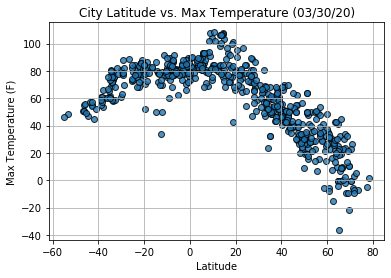

In [53]:
#Build a scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

#Incorporate the other graph properties
#plt.title (f'City Latitude vs. Max Temperature ({time.strftime('%x')})') #may have issue here
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel ('Latitude') 
plt.ylabel ('Max Temperature (F)')
plt.grid(True)

#save the figure
plt.savefig('output_data/Fig-1_Lat_vs_Temp')

# Latitude vs Humidity

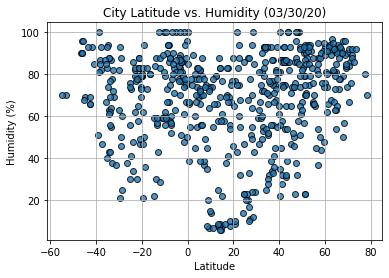

In [55]:
# build a scatter plot for latitude vs. humidity

#Build a scatter plot for latitude vs. temperature
plt.scatter(lats, humidity,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

#Incorporate the other graph properties
#plt.title (f'City Latitude vs. Max Temperature ({time.strftime('%x')})') #may have issue here
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel ('Latitude') 
plt.ylabel ('Humidity (%)')
plt.grid(True)

#save the figure
plt.savefig('output_data/Fig-2_Lat_vs_Humidity')

#show plot
plt.show()

# Latitude vs Cloudiness

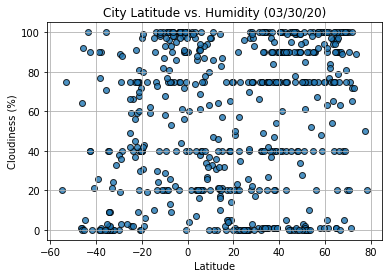

In [58]:
# build a scatter plot for latitude vs. humidity

#Build a scatter plot for latitude vs. temperature
plt.scatter(lats, cloudiness,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

#Incorporate the other graph properties
#plt.title (f'City Latitude vs. Max Temperature ({time.strftime('%x')})') #may have issue here
#plt.title("City Latitude vs. Cloudiness" % time.strftime("%x"))
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

plt.xlabel ('Latitude') 
plt.ylabel ('Cloudiness (%)')
plt.grid(True)

#save the figure
plt.savefig('output_data/Fig-3_Lat_vs_Cloudiness')

#show plot
plt.show()

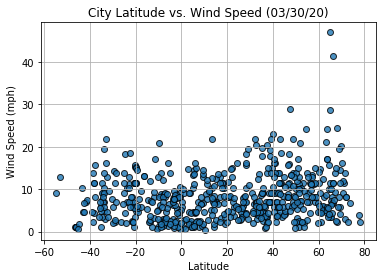

In [59]:
# build a scatter plot for latitude vs. humidity

#Build a scatter plot for latitude vs. temperature
plt.scatter(lats, wind_speed,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

#Incorporate the other graph properties
#plt.title (f'City Latitude vs. Max Temperature ({time.strftime('%x')})') #may have issue here
#plt.title("City Latitude vs. Cloudiness" % time.strftime("%x"))
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

plt.xlabel ('Latitude') 
plt.ylabel ('Wind Speed (mph)')
plt.grid(True)

#save the figure
plt.savefig('output_data/Fig-4_Lat_vs_WindSpeed')

#show plot
plt.show()

# Linear Regression

In [61]:
#create a funciton to create linear regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-squared is: {rvalue}')
    plt.show

In [62]:
#create north and south hemisphere dataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd['Lat'] >=0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd['Lat'] <0)]


### Max Temperature vs. Latitude Linear Regression

The r-squared is: -0.8936255945605105


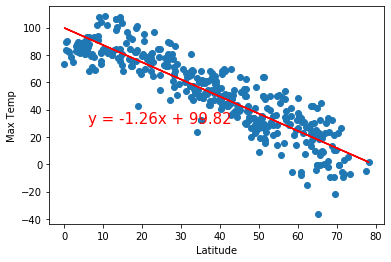

In [68]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

#save the figure
plt.savefig('output_data/Fig-5_Lat_vs_Max_Temp_LRegr_NorthHemi')

With an r-value of 0.89 temp and latitude has a strong coorelation. I give it a A-

The r-squared is: 0.5994167977116615


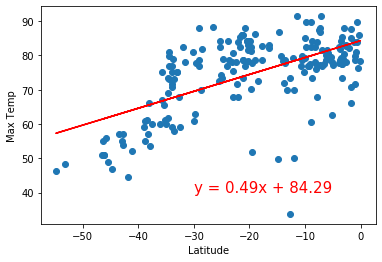

In [69]:
#Linear regression on southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

#save figure
plt.savefig('output_data/Fig-6_Lat_vs Max_Temp_LRegr_SouthHemi')


With an r-value of 0.59 this is on the border of a good coorelation. I give it a C-

# Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3770313815268608


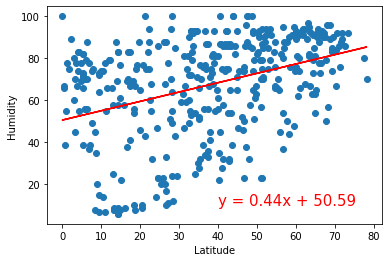

In [71]:
#Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

plt.savefig('output_data/Fig-7_Lat_vs_Humidity_LRegr_NorthHemi')

With low r-value of 0.37 humidity and latitude has a weak coorelation. I give it an F for a grade.

The r-squared is: 0.08242073704028217


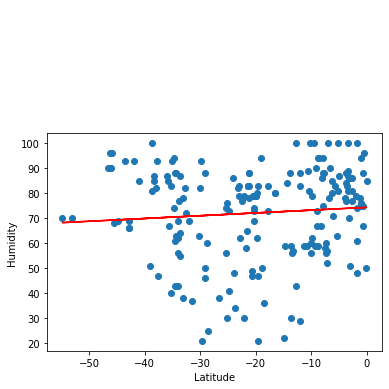

In [72]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

plt.savefig('output_data/Fig-8_Lat_vs_Humidity_LRegr_SouthHemi')

With low r-value of 0.08 humidity and latitude has a weak coorelation. I give it an F for a grade.

# Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23359317762632698


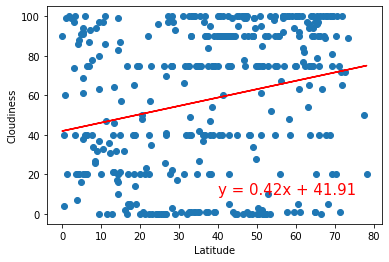

In [75]:
#Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

plt.savefig('output_data/Fig-9_Lat_vs_Cloudiness_LRegr_NorthHemi')

With low r-value of 0.23 cloudiness and latitude has a eak coorelation. I give it an F for a grade.

The r-squared is: 0.5290915214976953


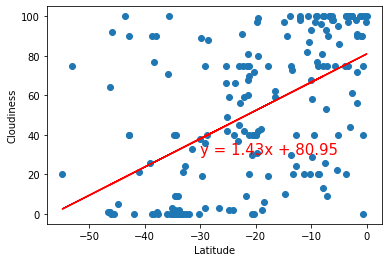

In [76]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

plt.savefig('output_data/Fig-10_Lat_vs_Cloudiness_LRegr_SouthHemi')

With low r-value of 0.53 cloudiness and latitude has a semi-weak coorelation. I give it an D for a grade.

# Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2081905846804401


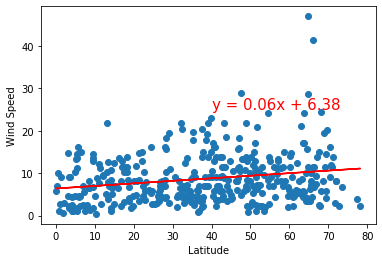

In [78]:
#Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

plt.savefig('output_data/Fig-11_Lat_vs_WindSpeed_LRegr_NorthHemi')

With low r-value of 0.21 wind speed and latitude has a weak coorelation. I give it an F for a grade.

The r-squared is: -0.10307811704300902


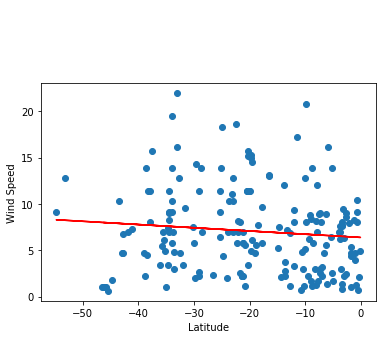

In [79]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

plt.savefig('output_data/Fig-12_Lat_vs_WindSpeed_LRegr_SouthHemi')

With low r-value of 0.1 wind speed and latitude has a weak coorelation. I give it an F for a grade.